# Representing Data and Engineering Features

Thus far we've analyzed conitnuous features, but not handled discrete features. Representing these discrete features
as well as augmenting data (either scaling or adding additional derived features) is known as feature engineering and is 
a crucial task for machine learning applications.

### Categorical Variables

One-Hot-Encoding (Dummy Variables)

In [3]:
# One-hot-encoding involves changing a categorical variables with N possible values into N different variables that
# have a single non-zero values (1) with the rest zero.

# We'll look at converting categorical variables to one-hots using pandas.
import pandas as pd

# The following csv file has no headers naming the columns, so we pass header=None and provide column names explicitly.
data = pd.read_csv("data/adult.data", header=None, index_col=False,
     names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'gender',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
            'income'])

# Pick out a few of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [4]:
# Using the value_counts method on a single column (a pandas Series) of a pandas DataFrame
# shows us what the unique values are and how often they appear
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [5]:
# The pandas get_dummies function transforms columns that have object type or 
# categorical type
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))


Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
# There's now a whole bunch of one-hot-encoded columns
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# We'll now convert this DataFrame to a numpy array, but we need to be sure we don't include
# the target variable(s).
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# Now get NumPy arrays from the DataFrame
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [11]:
# Now we're ready to use a scikit-learn algorithm, we'll use logistic regression here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numbers can Encode Categoricals

In [12]:
# Not all categorical data is given as strings, many are given as integers. In this case the get_dummies function
# will treat that column as continuous data and won't hot-encode it. The way around this is either using scikit-learn's
# OneHotEncoder, for which you can specify which variables are continous/discrete, or convert numeric columns in the
# DataFrame to strings manually. 

# In this example we create a DF with two columns, one strings one integers.
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [13]:
# Using get_dummies only encodes the string feature, not the integer feature
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [14]:
# Here's how we'd switch integer feature to a string and then pass the relevant columns to get_dummies
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Binning, Discretization, Linear Models, and Trees

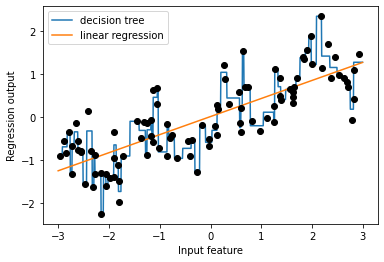

In [19]:
# The best way to represent data often depends on both the semantics of the data as well as the 
# type of model you're using.

# Return to the wave regression dataset, which has only a single input feature. Here's a comparison of
# linear regression and a decision tree regressor for that dataset
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

In [20]:
# One way to make linear models perform better on continuous data is to use binning, splitting
# the data into multiple features.

# For the previous example, start by defining 10 bins equally spaced between -3 and 3.
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [21]:
# Now the np.digitize function will compute which pin each data point falls into.
which_bin = np.digitize(X, bins=bins)
print("Data points:\n", X[:10])
print("Bin membership for data points:\n", which_bin[:10])

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]
 [ 2]
 [ 1]
 [ 9]
 [ 7]
 [ 8]]


In [22]:
# Now the continuous input feature has been transformed into a categorical feature.

# To use a scikit-learn ML model, we transform this new categorical feature into a one-hot encoding
# using OneHotEncoder from the preprocessing module.

# OneHotEncoder works the same as pandas get_dummies, but it only works on categorical data stored as integers.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
X_binned

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [23]:
# We specified 10 bins and there are 100 data points, so X_binned is size 100x10
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


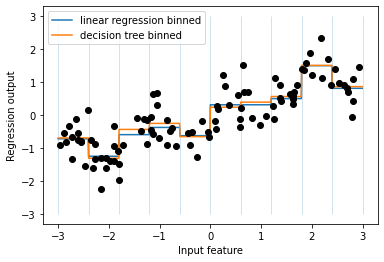

In [25]:
# We'll now build a linear regression and decision tree models on the one-hot-encoded data
# and compare it to the previous results.
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature");

The linear model got more flexible, while the decision tree got less flexible. Binning (generally) has no benefits
for decision tree models, since these models learn to split the data themselves.

Binning with a linear model can be useful when the dataset is very large and high-dimensional but some features have
nonlinear relations with the output.

### Interactions and Polynomials

Interaction and polynomial features are two additional ways to enrich feature presentation for linear models.

In [26]:
# Returning to the wave dataset with binning, the linear model learned a constant value for each bin. We
# can also have it learn slopes by adding the original feature back in, forming and 11d dataset.

X_combined = np.hstack([X, X_binned])
X_combined

array([[-0.75275929,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.70428584,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.39196365,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.43475389,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.84748524,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.35265144,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

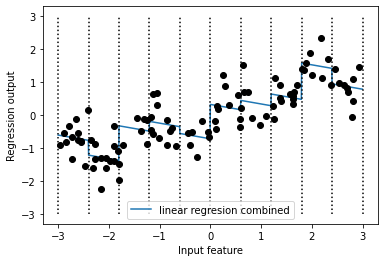

In [29]:
# Now retrain the model
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regresion combined')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k');

In [32]:
# That produced the same slope for each bin, but we'd rather a separate slope for each bin. So we 
# add an interaction feature that indicates which bin a data point is in and where it lies on the x-axis.
# This new feature is a product of the bin indicator and the original feature.

X_product = np.hstack([X_binned, X*X_binned])
X_product.shape

(100, 20)

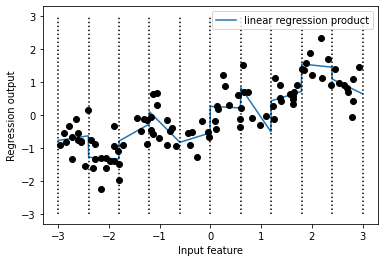

In [33]:
# Retrain again on this new feature set
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

In [34]:
# Polynomial features of the data are new features created from x such as x**2, x**3, etc.
# The preprocessing module in PolynomialFeatures implements this.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
# Using degree=10 gives 10 total features, x**1 through x**10
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [35]:
# Compare X_poly to X
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [36]:
# Calling get_feature names gives the power of the exponent used for each entry
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


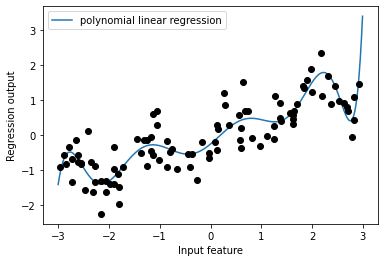

In [38]:
# Using polynomial features with linear regression yields polynomial regression
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

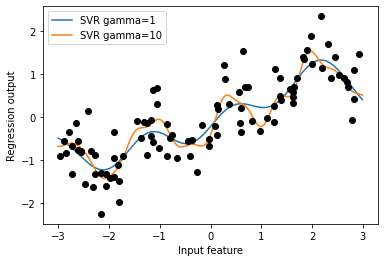

In [40]:
# For comparison, here's a kernel SVM model on the original data without transformation
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

In [41]:
# For a more complex/realistic dataset, return to Boston Housing. First load the data and rescale it to be between 0 and 1.
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Extract polynomial features and interactions up to degree 2
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [43]:
# The 105 above represents all of the possible second degree interactions between the features
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [44]:
# Now compare using Ridge with and without the interactions
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [45]:
# But now compare it with a random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.809
Score with interactions: 0.772
